In [1]:
# import zipfile

# f = zipfile.ZipFile("DRD_Split.zip",'r') # 压缩文件在jupyter中的位置
# for file in f.namelist():
#     f.extract(file,"DRD_Split_Cloud")               # 解压到的位置
# f.close()

In [2]:
# !pip install scipy

In [3]:
# # !pip install tensorflow-addons==0.18.0
# # !pip install scikit-learn
# !pip install seaborn


In [4]:
from tensorflow_addons.metrics import F1Score

In [5]:
import os
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization,Activation, concatenate, DepthwiseConv2D, Multiply,Dropout
from keras.layers import GlobalAveragePooling2D, Dense, MaxPooling2D,Flatten, Layer,BatchNormalization, Add,Reshape,AveragePooling2D

from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.optimizers import Adam

from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [6]:
input_shape = (229, 229, 3)

train_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Coursework\DR Datasets\DRD_Split\train'
test_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Coursework\DR Datasets\DRD_Split\test'

batch_size = 32
num_classes = 2
# filter_factor = 8

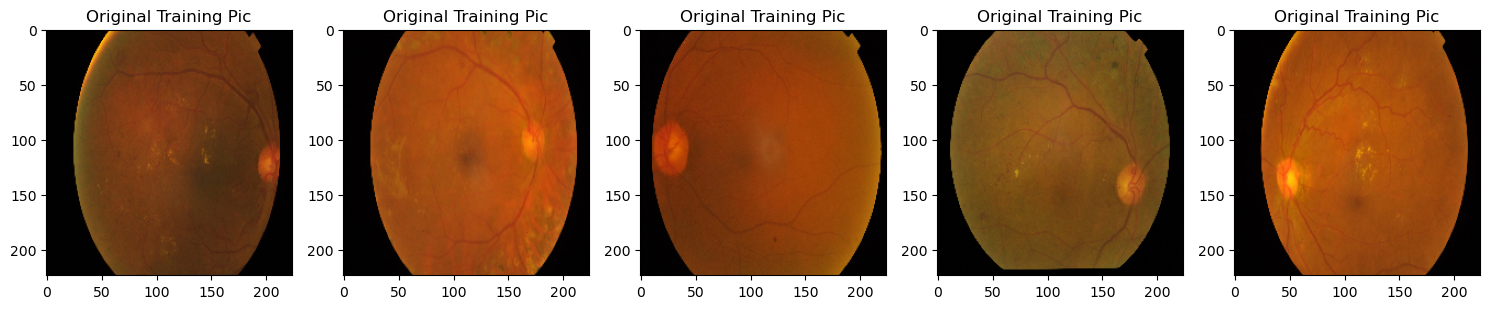

In [7]:
train_diabetic = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Coursework\DR Datasets\DRD_Split\train\diabetic'

#Show the import original image
train_img_files = os.listdir(train_diabetic)
# test_img_files = os.listdir(test_dir)
# val_img_files = os.listdir(val_dir)

show_num = 5

plt.figure(figsize = (15, 5))

for i in range(show_num):
    
    img_path = os.path.join(train_diabetic, train_img_files[i])
    img = plt.imread(img_path)
    plt.subplot(1, show_num, i + 1)
    plt.imshow(img)
    plt.axis('on')
    plt.title("Original Training Pic")
    
plt.tight_layout()
plt.show()


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.13,  # Specify the validation split here
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)
x, y = next(train_generator)
print(x.shape, y.shape)



Found 2708 images belonging to 2 classes.
Found 404 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
(8, 229, 229, 3) (8, 2)


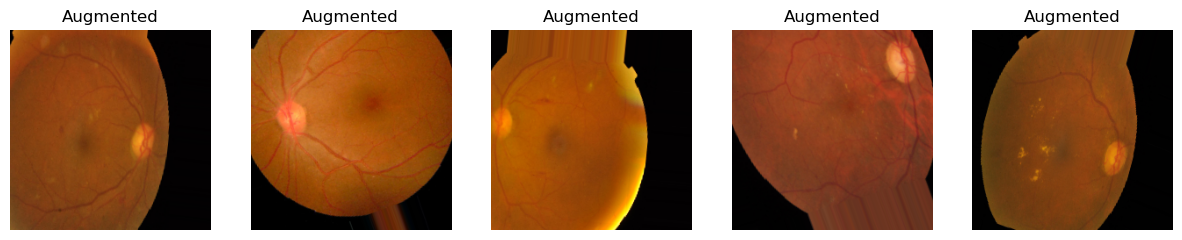

In [9]:
#To show the augmented pictures, after rotation, zoom in, rescale etc

# import scipy

# Extract a batch of images from the train_generator
sample_images, sample_labels = next(train_generator)

plt.figure(figsize = (15, 5))

# Show the original images from the batch
num_images_to_show = 5  # Show three images
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(sample_images[i-1])
    plt.title("Augmented")
    plt.axis('off')

In [10]:
base_model = InceptionV3(weights='imagenet', include_top=False)


x = base_model.output
x.shape
x = GlobalAveragePooling2D()(x)
x.shape


predictions = Dense(2, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


In [11]:


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

                                                                                                  
 average_pooling2d (AveragePool  (None, None, None,   0          ['max_pooling2d_1[0][0]']        
 ing2D)                         192)                                                              
                                                                                                  
 conv2d_5 (Conv2D)              (None, None, None,   12288       ['max_pooling2d_1[0][0]']        
                                64)                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, None, None,   76800       ['activation_6[0][0]']           
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_18 (Conv2D)             (None, None, None,   16384       ['average_pooling2d_1[0][0]']    
                                64)                                                               
                                                                                                  
 batch_normalization_12 (BatchN  (None, None, None,   192        ['conv2d_12[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_normalization_14 (BatchN  (None, None, None,   192        ['conv2d_14[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_nor

                                                                                                  
 batch_normalization_25 (BatchN  (None, None, None,   192        ['conv2d_25[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activation_19 (Activation)     (None, None, None,   0           ['batch_normalization_19[0][0]'] 
                                64)                                                               
                                                                                                  
 activation_21 (Activation)     (None, None, None,   0           ['batch_normalization_21[0][0]'] 
                                64)                                                               
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_36 (Conv2D)             (None, None, None,   114688      ['activation_35[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_31 (BatchN  (None, None, None,   384        ['conv2d_31[0][0]']              
 ormalization)                  128)                                                              
                                                                                                  
 batch_normalization_36 (BatchN  (None, None, None,   384        ['conv2d_36[0][0]']              
 ormalization)                  128)                                                              
          

 ormalization)                  160)                                                              
                                                                                                  
 activation_44 (Activation)     (None, None, None,   0           ['batch_normalization_44[0][0]'] 
                                160)                                                              
                                                                                                  
 conv2d_45 (Conv2D)             (None, None, None,   179200      ['activation_44[0][0]']          
                                160)                                                              
                                                                                                  
 batch_normalization_45 (BatchN  (None, None, None,   480        ['conv2d_45[0][0]']              
 ormalization)                  160)                                                              
          

 activation_48 (Activation)     (None, None, None,   0           ['batch_normalization_48[0][0]'] 
                                192)                                                              
                                                                                                  
 activation_49 (Activation)     (None, None, None,   0           ['batch_normalization_49[0][0]'] 
                                192)                                                              
                                                                                                  
 mixed5 (Concatenate)           (None, None, None,   0           ['activation_40[0][0]',          
                                768)                              'activation_43[0][0]',          
                                                                  'activation_48[0][0]',          
                                                                  'activation_49[0][0]']          
          

 batch_normalization_53 (BatchN  (None, None, None,   576        ['conv2d_53[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_58 (BatchN  (None, None, None,   576        ['conv2d_58[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_59 (BatchN  (None, None, None,   576        ['conv2d_59[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_50 (Activation)     (None, None, None,   0           ['batch_normalization_50[0][0]'] 
          

 conv2d_60 (Conv2D)             (None, None, None,   147456      ['mixed6[0][0]']                 
                                192)                                                              
                                                                                                  
 conv2d_63 (Conv2D)             (None, None, None,   258048      ['activation_62[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_68 (Conv2D)             (None, None, None,   258048      ['activation_67[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_69 (Conv2D)             (None, None, None,   147456      ['average_pooling2d_6[0][0]']    
          

 batch_normalization_71 (BatchN  (None, None, None,   960        ['conv2d_71[0][0]']              
 ormalization)                  320)                                                              
                                                                                                  
 batch_normalization_75 (BatchN  (None, None, None,   576        ['conv2d_75[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_71 (Activation)     (None, None, None,   0           ['batch_normalization_71[0][0]'] 
                                320)                                                              
                                                                                                  
 activation_75 (Activation)     (None, None, None,   0           ['batch_normalization_75[0][0]'] 
          

                                384)                                                              
                                                                                                  
 activation_79 (Activation)     (None, None, None,   0           ['batch_normalization_79[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_82 (Activation)     (None, None, None,   0           ['batch_normalization_82[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_83 (Activation)     (None, None, None,   0           ['batch_normalization_83[0][0]'] 
                                384)                                                              
          

 ormalization)                  384)                                                              
                                                                                                  
 batch_normalization_92 (BatchN  (None, None, None,   1152       ['conv2d_92[0][0]']              
 ormalization)                  384)                                                              
                                                                                                  
 conv2d_93 (Conv2D)             (None, None, None,   393216      ['average_pooling2d_8[0][0]']    
                                192)                                                              
                                                                                                  
 batch_normalization_85 (BatchN  (None, None, None,   960        ['conv2d_85[0][0]']              
 ormalization)                  320)                                                              
          

In [12]:
lr = 0.001
Optimizer = Adam(learning_rate = lr)

from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow_addons.metrics import F1Score
from tensorflow.keras import backend as K


model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=[
        'accuracy', 
        Precision(), 
        Recall(), 
        AUC(), 
        F1Score(num_classes=2, average = 'micro')
    ]
)
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1,
                                patience = 10,
                                min_lr = 0.00001,
                                verbose = 1)



In [13]:
MODEL_NAME = "InceptionV3_Pretrained"  # 用您的模型名替换
# 训练合并后的模型
csv_logger = tf.keras.callbacks.CSVLogger(
    fr"C:\Users\MSI-PC\Desktop\Level 6 curriculum\Corsework\Machine Vision\Final Codes\Final Test\HistoryCSV\{MODEL_NAME}.csv", 
    separator=",", 
    append=False)

history = model.fit(
    train_generator,
    epochs=100,  # 根据需要调整epochs数
    validation_data=validation_generator,
    callbacks=[csv_logger, lr_reduction]  # 添加 ModelCheckpoint 到回调列表
)


Epoch 1/100
339/339 [==============================] - 65s 154ms/step - loss: 0.3873 - accuracy: 0.8427 - precision: 0.8427 - recall: 0.8427 - auc: 0.9135 - f1_score: 0.8427 - val_loss: 6.1697 - val_accuracy: 0.4901 - val_precision: 0.4901 - val_recall: 0.4901 - val_auc: 0.4775 - val_f1_score: 0.4901 - lr: 0.0010
Epoch 2/100
339/339 [==============================] - 46s 136ms/step - loss: 0.2937 - accuracy: 0.8885 - precision: 0.8885 - recall: 0.8885 - auc: 0.9499 - f1_score: 0.8885 - val_loss: 0.3134 - val_accuracy: 0.8614 - val_precision: 0.8614 - val_recall: 0.8614 - val_auc: 0.9584 - val_f1_score: 0.8614 - lr: 0.0010
Epoch 3/100
339/339 [==============================] - 44s 128ms/step - loss: 0.2455 - accuracy: 0.9151 - precision: 0.9151 - recall: 0.9151 - auc: 0.9620 - f1_score: 0.9151 - val_loss: 0.2827 - val_accuracy: 0.8614 - val_precision: 0.8614 - val_recall: 0.8614 - val_auc: 0.9572 - val_f1_score: 0.8614 - lr: 0.0010
Epoch 4/100
339/339 [==============================] - 

Epoch 27/100
339/339 [==============================] - 43s 126ms/step - loss: 0.1168 - accuracy: 0.9605 - precision: 0.9605 - recall: 0.9605 - auc: 0.9897 - f1_score: 0.9605 - val_loss: 0.0961 - val_accuracy: 0.9827 - val_precision: 0.9827 - val_recall: 0.9827 - val_auc: 0.9930 - val_f1_score: 0.9827 - lr: 0.0010
Epoch 28/100
339/339 [==============================] - 42s 123ms/step - loss: 0.0991 - accuracy: 0.9694 - precision: 0.9694 - recall: 0.9694 - auc: 0.9925 - f1_score: 0.9694 - val_loss: 0.1675 - val_accuracy: 0.9406 - val_precision: 0.9406 - val_recall: 0.9406 - val_auc: 0.9824 - val_f1_score: 0.9406 - lr: 0.0010
Epoch 29/100
339/339 [==============================] - 45s 132ms/step - loss: 0.1156 - accuracy: 0.9631 - precision: 0.9631 - recall: 0.9631 - auc: 0.9898 - f1_score: 0.9631 - val_loss: 0.0709 - val_accuracy: 0.9851 - val_precision: 0.9851 - val_recall: 0.9851 - val_auc: 0.9954 - val_f1_score: 0.9851 - lr: 0.0010
Epoch 30/100
339/339 [==============================

Epoch 76/100
339/339 [==============================] - 44s 130ms/step - loss: 0.0536 - accuracy: 0.9815 - precision: 0.9815 - recall: 0.9815 - auc: 0.9978 - f1_score: 0.9815 - val_loss: 0.0745 - val_accuracy: 0.9777 - val_precision: 0.9777 - val_recall: 0.9777 - val_auc: 0.9955 - val_f1_score: 0.9777 - lr: 1.0000e-05
Epoch 77/100
339/339 [==============================] - 45s 131ms/step - loss: 0.0484 - accuracy: 0.9834 - precision: 0.9834 - recall: 0.9834 - auc: 0.9981 - f1_score: 0.9834 - val_loss: 0.0793 - val_accuracy: 0.9802 - val_precision: 0.9802 - val_recall: 0.9802 - val_auc: 0.9947 - val_f1_score: 0.9802 - lr: 1.0000e-05
Epoch 78/100
339/339 [==============================] - 45s 132ms/step - loss: 0.0416 - accuracy: 0.9852 - precision: 0.9852 - recall: 0.9852 - auc: 0.9983 - f1_score: 0.9852 - val_loss: 0.0735 - val_accuracy: 0.9827 - val_precision: 0.9827 - val_recall: 0.9827 - val_auc: 0.9942 - val_f1_score: 0.9827 - lr: 1.0000e-05
Epoch 79/100
339/339 [==================

In [14]:
# history = model.fit(train_generator, epochs = 100, validation_data=(validation_generator), callbacks = [lr_reduction, early_stopping])

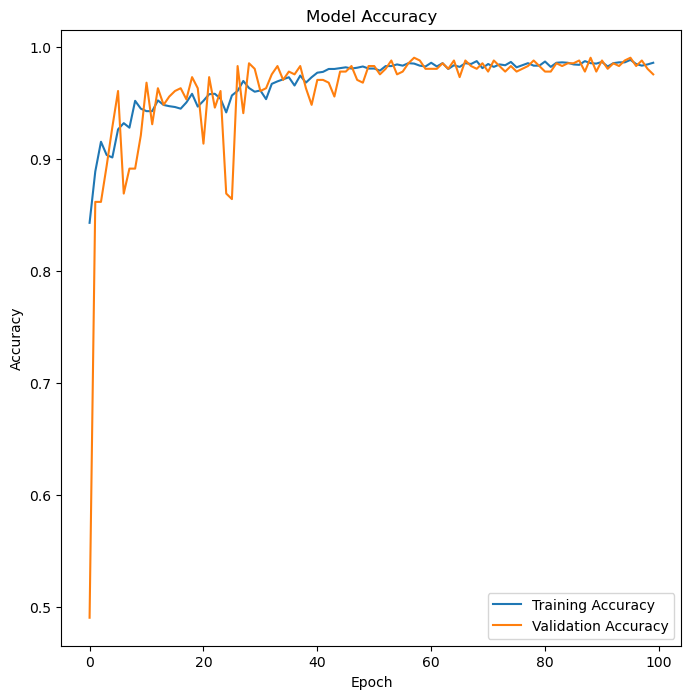

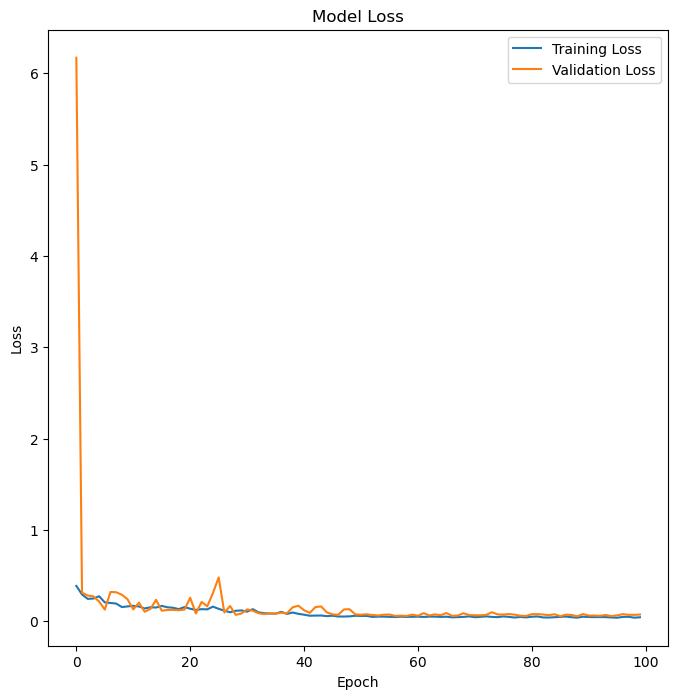

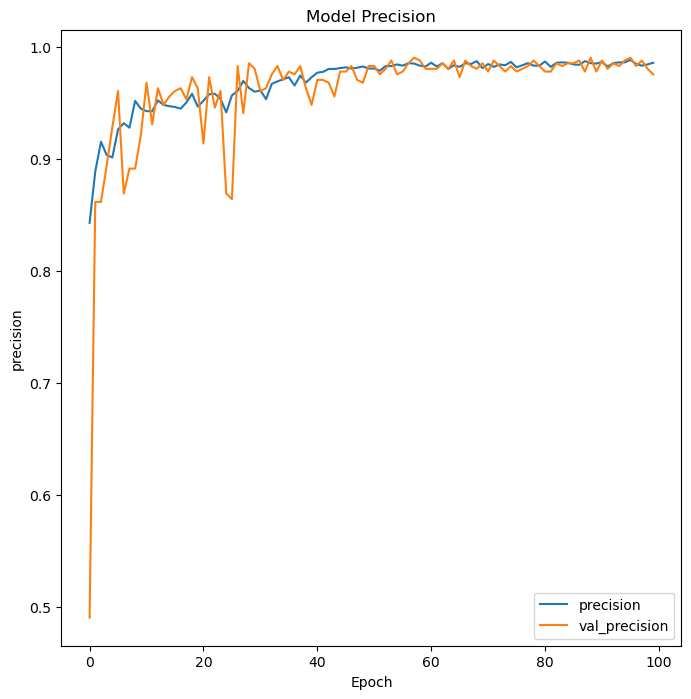

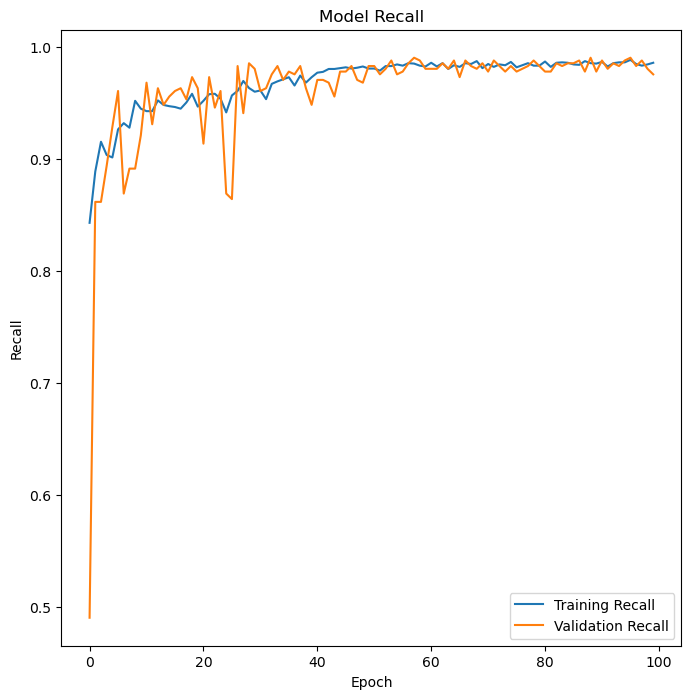

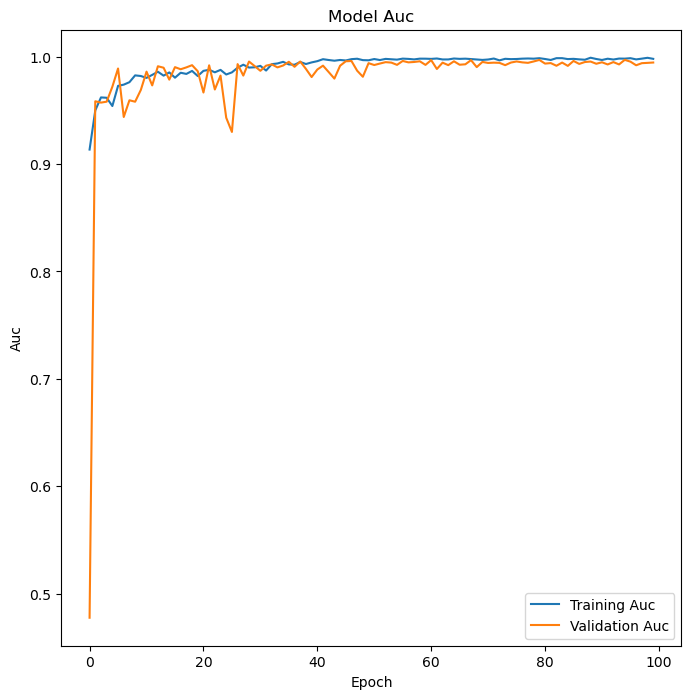

In [17]:
plt.figure(figsize = (8, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()


plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.legend(['precision', 'val_precision'], loc = 'lower right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'],loc='lower right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model Auc')
plt.xlabel('Epoch')
plt.ylabel('Auc')
plt.legend(['Training Auc', 'Validation Auc'],loc='lower right')
plt.show()

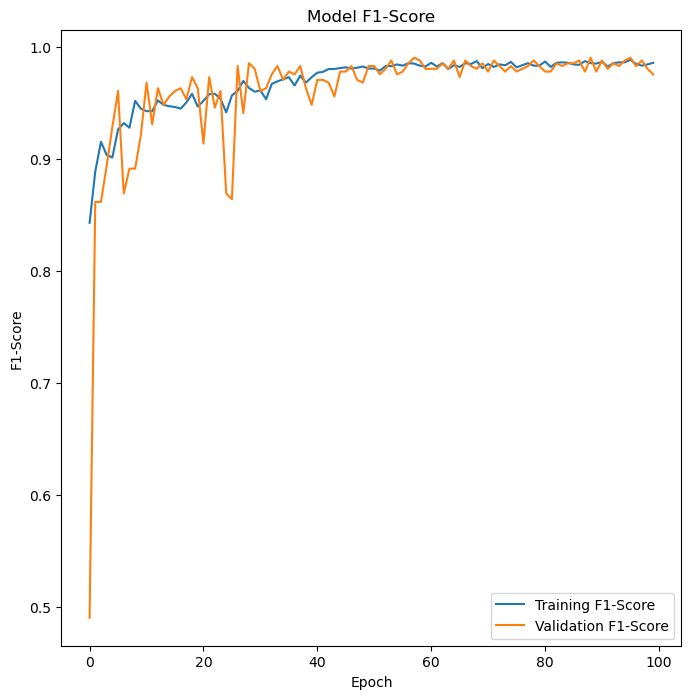

In [18]:
plt.figure(figsize =(8, 8))
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1-Score')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.legend(['Training F1-Score', 'Validation F1-Score'], loc= 'lower right')
plt.show()


17/17 [==============================] - 4s 62ms/step


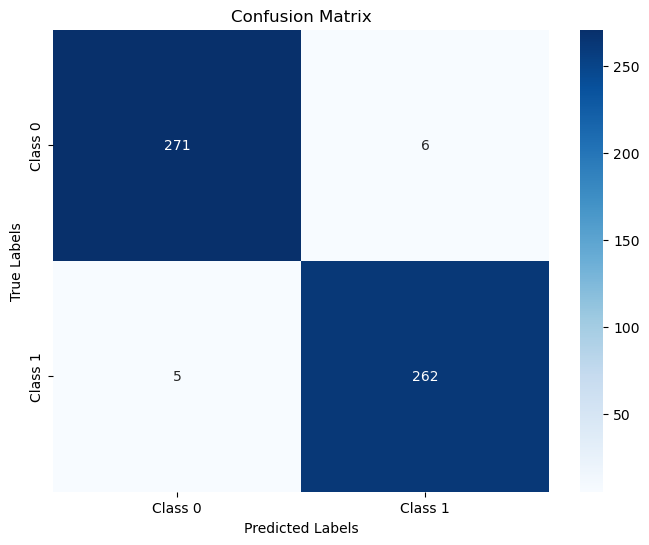

In [19]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 收集图像和真实标签
all_images, all_true_labels = zip(*[next(test_generator) for _ in range(test_generator.samples // test_generator.batch_size)])
all_images = np.concatenate(all_images)
all_true_labels = np.argmax(np.concatenate(all_true_labels), axis=1)

# 进行预测并获取预测标签
predictions = model.predict(all_images)
predicted_labels = np.argmax(predictions, axis=1)

# 生成并绘制混淆矩阵
conf_matrix = confusion_matrix(all_true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [20]:
from sklearn.metrics import f1_score


# 计算F1-Score
f1 = f1_score(all_true_labels, predicted_labels, average='macro')

print("F1-Score:", f1)


f1_each_class = f1_score(all_true_labels, predicted_labels, average=None)
print("F1-Score for each class:", f1_each_class)


F1-Score: 0.9797738757161447
F1-Score for each class: [0.9801085  0.97943925]


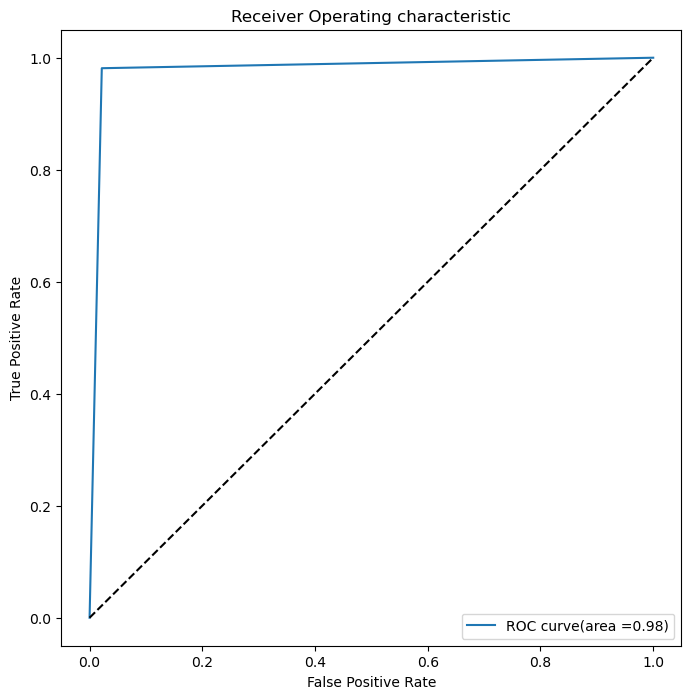

In [21]:
#compute precision-recall score
from sklearn.metrics import roc_curve, auc

#compute precision, recall(sensitivity), and threshold values
fpr, tpr, thresholds = roc_curve(all_true_labels, predicted_labels)

#compute the AUC score
roc_auc= auc(fpr, tpr)

#plot the precision-recall curve
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label= 'ROC curve(area =%0.2f)' %roc_auc)
plt.plot([0, 1], [0,1], 'k--')
plt.title('Receiver Operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [22]:
#compute sensitivity and specificity
sensitivity=tpr[1] #True positive rate 
specificity= 1-fpr[1]

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.9812734082397003
specificity: 0.9783393501805054


17/17 [==============================] - 1s 67ms/step


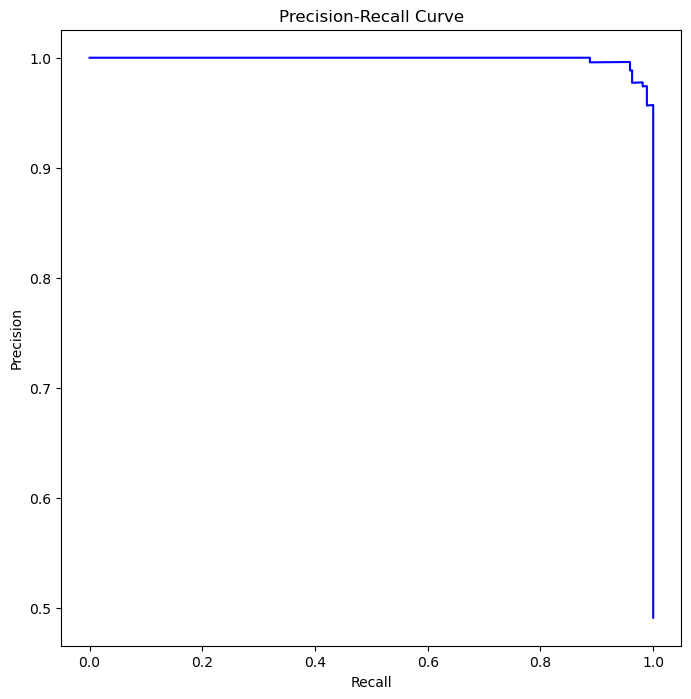

In [23]:
from sklearn.metrics import precision_recall_curve

# 计算预测概率
ensemble_pred_probs = model.predict(all_images)

# 获取预测正类的概率
# 假设是二分类问题，并且正类是第二个类别
positive_class_probs = ensemble_pred_probs[:, 1]

# 计算 Precision 和 Recall
precision, recall, thresholds = precision_recall_curve(all_true_labels, positive_class_probs)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='b')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [24]:
test_loss, test_acc, test_precision, test_recall, test_auc, test_f1_score = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test AUC:', test_auc)
print('Test F1 Score:', test_f1_score)

69/69 [==============================] - 3s 48ms/step - loss: 0.0519 - accuracy: 0.9782 - precision: 0.9782 - recall: 0.9782 - auc: 0.9985 - f1_score: 0.9782
Test loss: 0.051884423941373825
Test accuracy: 0.9781818389892578
Test precision: 0.9781818389892578
Test recall: 0.9781818389892578
Test AUC: 0.9984859824180603
Test F1 Score: 0.978181779384613


In [25]:
from sklearn.metrics import classification_report

# 使用模型对验证集进行预测，获取预测概率
y_pred_probs = model.predict(all_images)

# 将预测概率转换为类别标签
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 假设 y_val 是真实标签，并且也是类别标签形式
# 现在您可以生成分类报告
report = classification_report(all_true_labels, y_pred_labels)
print(report)


17/17 [==============================] - 1s 65ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       277
           1       0.98      0.98      0.98       267

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544



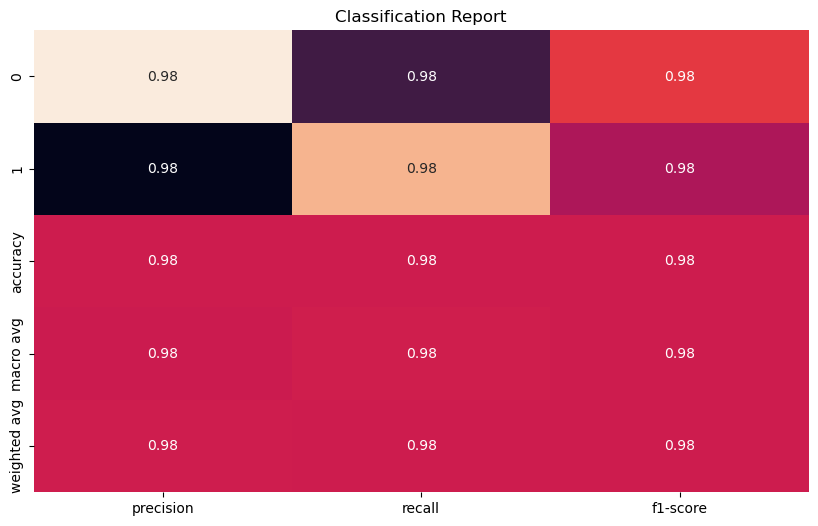

In [26]:
import pandas as pd


# Generate a classification report (replace this with your actual data)
report = classification_report(all_true_labels, y_pred_labels, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column, as it's not suitable for the heatmap
report_df = report_df.drop(columns=['support'])

# Draw the heatmap with the default colormap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cbar=False)
plt.title("Classification Report")
plt.show()

In [ ]:
#delete the model to prevent memory costs

from keras import backend as K
import gc

K.clear_session()
gc.collect()

del model


from numba import cuda

cuda.select_device(0)
cuda.close()